In [3]:
import numpy as np
import time

In [4]:
# cuando usemos numpy, notemos que
#
#a = np.array([[1,2,3,4,5],[-1,2,6,3,1],[0,1,-1,-6,-7]])
# 
# es una matriz de la forma:
#      ( 1 2  3 4  5)
#  a = (-1 2  6 3  1)
#      ( 0 1 -1 6 -7)
# es decir, de 3 filas y 5 columnas
# a = np.array([[1,2,3,4,5],[-1,2,6,3,1],[0,1,-1,-6,-7]])
# a.shape
# >>> (3,5)
# Ahora si tenemos dos vectores:
# b = np.array([1,2,3])
# c = np.array([-1,-2,-3,-4,-5])
# de largo 3 y 5 respectivamente, notemos que:
# a+b, no estará definido
# a+b >>> ValueError: operands could not be broadcast together with shapes (3,5) (3,)
# mientras que 
# a+c, si lo está, es más, será equivalente a sumarle a cada fila de a, el valor de c, esto es:
#
#              ( 1 2  3 4  5) + (-1 -2 -3 -4 -5)   (  0   0   0   0   0)
# >>> a+c      (-1 2  6 3  1) + (-1 -2 -3 -4 -5) = ( -2   0   3  -1  -4)
#              ( 0 1 -1 6 -7) + (-1 -2 -3 -4 -5)   ( -1  -1  -4 -10 -12)
#
# Ahora, si queremos que b se le sume a las columnas de a, entonces
# podemos aumentar en una dimensión b, para que quede un vector columna, esto es:
#
#                                                 (1)
# b:= b[:,np.newaxis] = np.array([[1],[2],[3]]) = (2)
#                                                 (3)
# Así, la suma entre a + b ahora será, b[:,np.newaxis] = b[:,None]
#
#                         ( 1 2  3 4  5) + (1 1 1 1 1)   ( 2  3  4  5  6)
# >>> a+b[:,np.newaxis] = (-1 2  6 3  1) + (2 2 2 2 2) = ( 1  4  8  5  3)
#                         ( 0 1 -1 6 -7) + (3 3 3 3 3)   ( 3  4  2 -3 -4)

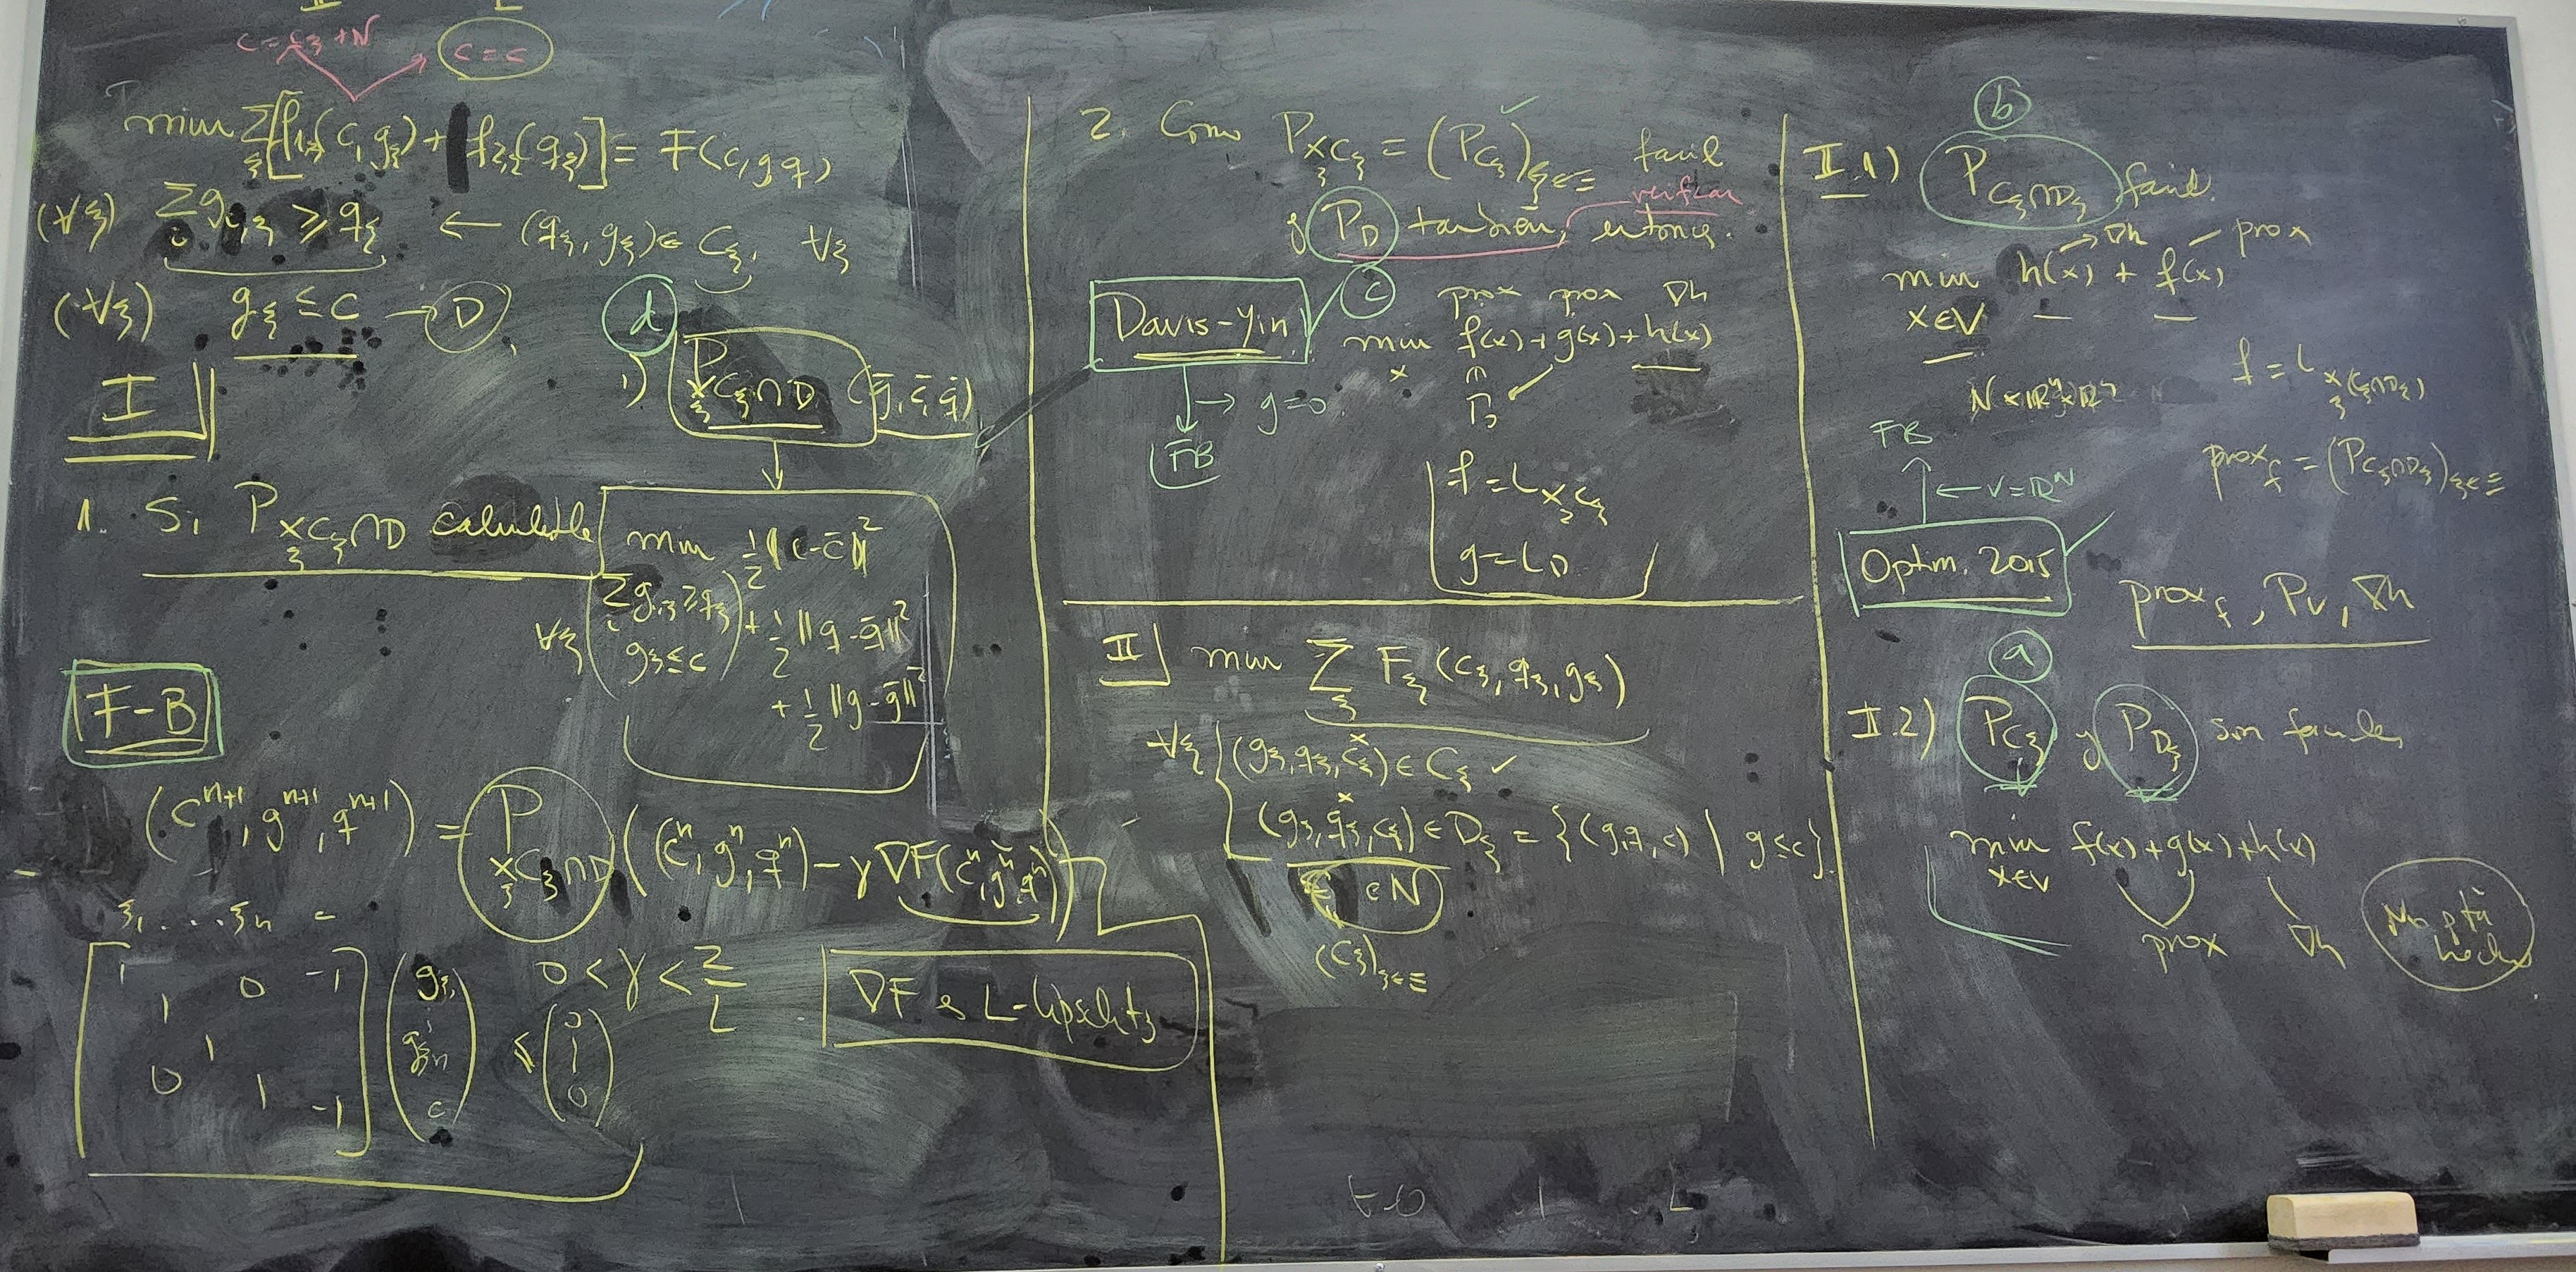

Notemos que de la imagen tiene en la esquina superior izquierda un problema de minimización que se puede calcular mediante 4 métodos distintos, para utilizar estos métodos,debemos calcular ciertas proyecciones, estas son:

- Si $c=:x^{1}\in\mathbb{R}^{N}$, $g=:x^{2}\in\mathbb{R}^{M\times N}$ y $q:=x^{3}\in\mathbb{R}^{M}$, ie, no está en el espacio de no anticipatividad.
    - Si $j\in\{1,...,M\}$ y $i\in\{1,...,N\}$, definimos:
        \begin{align}
            D&& =&&\{(x^{1},x^{2},x^{3})\in\mathbb{R}^{N}\times\mathbb{R}^{M\times N}\times\mathbb{R}^{M}\ \mid\ x_{j}^{2}\leq x^{1},\ \forall j\in\{1,...,M\}\}&& \\
            && =&&\{(x^{1},x^{2})\in\mathbb{R}^{N}\times\mathbb{R}^{M\times N}\ \mid\ x_{ji}^{2}\leq x_{i}^{1},\forall j\in\{1,...,M\} ,\forall i\in\{1,...,N\}\}\times\mathbb{R}^{N}&& \\
            && =&&\times_{i=1}^{N}\{(x_{i}^{1},x_{i}^{2})\in\mathbb{R}\times\mathbb{R}^{M}\ \mid\ x_{ji}^{2}\leq x_{i}^{1},\forall j\in\{1,...,M\}\}\times\mathbb{R}^{N}=:\times_{i=1}^{N}D_{i}\times\mathbb{R}^{N}
        \end{align}
    y 
        \begin{align}
            C&& =&&\{(x^{1},x^{2},x^{3})\in\mathbb{R}^{N}\times\mathbb{R}^{M\times N}\times\mathbb{R}^{M}\ \mid\ \sum_{i=1}^{N}x_{i}^{2}\geq x^{3}\} \\
            && =&&\mathbb{R}^{N}\times\{(x^{2},x^{3})\in\mathbb{R}^{M\times N}\times\mathbb{R}^{M}\ \mid\ \sum_{i=1}^{N}x_{ji}^{2}\geq x_{j}^{3},\ \forall j\in\{1,...,M\}\}\} \\
            && =&&\mathbb{R}^{N}\times\times_{j=1}^{M}\{(x_{j}^{2},x_{j}^{3})\in\mathbb{R}^{N}\times\mathbb{R}\ \mid\ \sum_{i=1}^{N}x_{ji}^{2}\geq x_{j}^{3}\}\}=:\mathbb{R}^{N}\times_{j=1}^{M}C_{j} \\
        \end{align}

Para tener uniformidad en la notacion que estamos utilizaremos, consideremos por:

In [11]:
N, M = 3, 5

x1_barra        = np.random.randint(0,10, size=(N, 1))+0.0
x1_N_barra      = np.random.randint(0,10, size=(N, M))+0.0
x2_barra        = np.random.randint(0,10, size=(N, M))+0.0
x2_barra_copy   = np.random.randint(0,10, size=(N, M))+0.0
x3_barra        = np.random.randint(0,10, size=(1, M))-100.0

D = np.random.randint(0,10, size=(1, M))+0.0

proba  = np.random.rand(M)  # Generar un arreglo aleatorio entre 0 y 1
proba /= proba.sum()  # Dividir cada elemento por la suma total del arreglo

print(f"x1_barra Dimension {  x1_barra.shape  }:\n{x1_barra}")
print(f"x1_N_barra Dimension {x1_N_barra.shape}:\n{x1_N_barra}")
print(f"x2_barra Dimension {  x2_barra.shape  }:\n{x2_barra}")
print(f"x2_barra_copy Dimension {  x2_barra_copy.shape  }:\n{x2_barra_copy}")
print(f"x3_barra Dimension {  x3_barra.shape  }:\n{x3_barra}")

x1_barra Dimension (3, 1):
[[2.]
 [1.]
 [4.]]
x1_N_barra Dimension (3, 5):
[[0. 7. 6. 7. 2.]
 [9. 6. 4. 3. 8.]
 [5. 7. 3. 9. 6.]]
x2_barra Dimension (3, 5):
[[1. 1. 2. 3. 3.]
 [4. 0. 7. 7. 2.]
 [6. 6. 4. 6. 2.]]
x2_barra_copy Dimension (3, 5):
[[8. 9. 5. 2. 1.]
 [7. 9. 2. 7. 2.]
 [3. 3. 6. 5. 1.]]
x3_barra Dimension (1, 5):
[[-100.  -92.  -92.  -98.  -91.]]


## $P_{D}(\overline{x})$, sin no-anticipatividad:

In [12]:
def P_D_without_non_ancitipitave(x1_barra: np.array, x2_barra: np.ndarray) -> tuple:
    """
        Input:
            - x1_barra: np.array(Nx1)
            - x2_barra: np.array(NxM)
        Output:
            - tuple (x1,x2) (np.array,np.array)
        Work:
            The function give the point x1, x2 that are the 
            projection of x1_barra, x2_barra over D without
            non-ancitipative policy.
    """
    diff = np.maximum(x2_barra - x1_barra, 0) 
    scale_factor = 1/((x2_barra > x1_barra).sum(axis=1) + 1)
    
    x1 = x1_barra + (scale_factor * diff.sum(axis = 1))[:,np.newaxis]
    x2 = x2_barra + np.where(x2_barra <= x1_barra, 0, (scale_factor * diff.sum(axis=1))[:,np.newaxis] -  diff)

    return x1, x2

In [13]:
%timeit P_D_without_non_ancitipitave(x1_barra, x2_barra)
P_D_without_non_ancitipitave(x1_barra, x2_barra)

35.8 µs ± 3.78 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([[2.66666667],
        [4.2       ],
        [5.5       ]]),
 array([[1.        , 1.        , 2.        , 2.66666667, 2.66666667],
        [4.2       , 0.        , 4.2       , 4.2       , 4.2       ],
        [5.5       , 5.5       , 4.        , 5.5       , 2.        ]]))

## $P_{C_{j}}(x,  Demanda)$

In [50]:
def P_C_demanda(x2_barra: np.ndarray, x3_barra: np.ndarray, D: np.ndarray) -> tuple:
    """
        Input:
            - x2_barra: np.array(NxM)
            - x3_barra: np.array(1xM)
            - D       : np.array(1xM) Término que simboliza la demanda
        Output:
            - tuple (x2,x3) (np.array,np.array)
        Work:
            The function give the point x2, x3 that are the 
            projection of x2_barra, x3_barra over C.
    """
    N,M = x2_barra.shape
    
    diff = np.maximum(D-x3_barra - x2_barra.sum(axis=0),0)
    scale_factor = ((N + 1) ** -1) 
    
    x2 = x2_barra + scale_factor * diff
    x3 = x3_barra + scale_factor * diff
    
    return x2, x3

In [51]:
%timeit P_C_demanda(x2_barra,x3_barra, D)
P_C_demanda(x2_barra,x3_barra, D+2000)

21.3 µs ± 5.37 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


(array([[525.5 , 522.25, 522.  , 524.5 , 526.25],
        [528.5 , 521.25, 527.  , 528.5 , 525.25],
        [530.5 , 527.25, 524.  , 527.5 , 525.25]]),
 array([[424.5 , 429.25, 428.  , 423.5 , 432.25]]))

## $P_{C_{j}}(x)$

In [8]:
def P_C(x2_barra: np.ndarray, x3_barra: np.ndarray) -> tuple:
    """
        Input:
            - x2_barra: np.array(NxM)
            - x3_barra: np.array(1xM)
        Output:
            - tuple (x2,x3) (np.array,np.array)
        Work:
            The function give the point x2, x3 that are the 
            projection of x2_barra, x3_barra over C.
    """
    N,M = x2_barra.shape
    
    diff = np.maximum(x3_barra - x2_barra.sum(axis=0),0)
    scale_factor = ((N + 1) ** -1) 
    
    x2 = x2_barra + scale_factor * diff
    x3 = x3_barra - scale_factor * diff
    
    return x2, x3

In [10]:
%timeit P_C(x2_barra,x3_barra)
P_C(x2_barra,x3_barra)

22.4 µs ± 4.8 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


(array([[29.75, 31.25, 32.  , 22.  , 23.25],
        [22.75, 24.25, 26.  , 30.  , 28.25],
        [27.75, 26.25, 24.  , 29.  , 30.25]]),
 array([[80.25, 81.75, 82.  , 81.  , 81.75]]))

- Si $c=:x^{1}\in\mathbb{R}^{M\times N}$, $g=:x^{2}\in\mathbb{R}^{M\times N}$ y $q:=x^{3}\in\mathbb{R}^{M}$, ie, está en el espacio de no anticipatividad.
    - Si $j\in\{1,...,M\}$ y $i\in\{1,...,N\}$, definimos:
        \begin{align}
            D&& =&&\{(x^{1},x^{2},x^{3})\in\mathbb{R}^{M\times N}\times\mathbb{R}^{M\times N}\times\mathbb{R}^{M}\ \mid\ x_{j}^{2}\leq x_{j}^{1},\ \forall j\in\{1,...,M\}\}&& \\
            && =&&\{(x^{1},x^{2})\in\mathbb{R}^{M\times N}\times\mathbb{R}^{M\times N}\ \mid\ x_{ji}^{2}\leq x_{ji}^{1},\forall j\in\{1,...,M\} ,\forall i\in\{1,...,N\}\}\times\mathbb{R}^{N}&& \\
            && =&&\times_{j=1}^{M}\times_{i=1}^{N}\{(x_{ji}^{1},x_{ji}^{2})\in\mathbb{R}\times\mathbb{R}\ \mid\ x_{ji}^{2}\leq x_{i}^{1}\}\times\mathbb{R}^{N}=:\times_{j=1}^{M}\times_{i=1}^{N}D_{ji}\times\mathbb{R}^{N}
        \end{align}
    y 
    \begin{align}
        C&& =&&\{(x^{1},x^{2},x^{3})\in\mathbb{R}^{M\times N}\times\mathbb{R}^{M\times N}\times\mathbb{R}^{M}\ \mid\ \sum_{i=1}^{N}x_{i}^{2}\geq x^{3}\} \\
        && =&&\mathbb{R}^{M\times N}\times\{(x^{2},x^{3})\in\mathbb{R}^{M\times N}\times\mathbb{R}^{M}\ \mid\ \sum_{i=1}^{N}x_{ji}^{2}\geq x_{j}^{3},\ \forall j\in\{1,...,M\}\}\} \\
        && =&&\mathbb{R}^{M\times N}\times\times_{j=1}^{M}\{(x_{j}^{2},x_{j}^{3})\in\mathbb{R}^{N}\times\mathbb{R}\ \mid\ \sum_{i=1}^{N}x_{ji}^{2}\geq x_{j}^{3}\}\} \\
    \end{align}

## $P_{D_{ji}}(x)$, con anticipatividad:

In [11]:
import numpy as np

def P_D_non_anticipative(x1_N_barra: np.array, x2_barra: np.array) -> tuple:
    """
        Input:
            - x1_barra: np.array(NxM)
            - x2_barra: np.array(NxM)
        Output:
            - tuple (x1,x2) (np.array,np.array)
        Work:
            The function give the point x1, x2 that are the 
            projection of x1_N_barra, x2_barra over D with
            non-anticipative.
    """
    diff = np.maximum(x2_barra - x1_N_barra, 0)
    
    x1 = x1_N_barra + 0.5 * diff
    x2 = x2_barra   - 0.5 * diff
    
    return x1, x2

In [12]:
%timeit P_D_non_anticipative(x1_N_barra, x2_barra)
P_D_non_anticipative(x1_N_barra, x2_barra)

13.2 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


(array([[7. , 5.5, 4.5, 6. , 1. ],
        [1. , 1.5, 1. , 9. , 4.5],
        [5.5, 2. , 4. , 6. , 8. ]]),
 array([[7. , 5.5, 4.5, 0. , 0. ],
        [1. , 1.5, 1. , 8. , 4.5],
        [5.5, 2. , 0. , 6. , 7. ]]))

## $P_{\mathcal{N}}(x)$, anticipatividad:

In [25]:
def P_N(x1_N_barra : np.array, proba :np.array) -> np.array:
    """
        Input:
            - x1_N_barra: np.array(NxM)
        Output:
            - np.array x1
        Work:
            The function give the point x1 that is the 
            projection of x1_N_barra over N, the
            non-anticipative linear space.
    """
    _, M = x1_N_barra.shape
    return np.tile(np.matmul(x1_N_barra, proba[:,np.newaxis]),(1,M))

In [26]:
print("proba:", proba)

%timeit P_N(x1_N_barra, proba)
P_N(x1_N_barra, proba)

proba: [0.14549941 0.26691596 0.18465165 0.03087916 0.37205382]
10.2 µs ± 722 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


array([[4.33028805, 4.33028805, 4.33028805, 4.33028805, 4.33028805],
       [5.71079649, 5.71079649, 5.71079649, 5.71079649, 5.71079649],
       [2.99069914, 2.99069914, 2.99069914, 2.99069914, 2.99069914]])

## $P_{C_{j}\cap D_{j}}(x)$, con anticipatividad:

In [16]:
def P_CinterD(x1_N_barra : np.array, x2_barra : np.array, x2_barra_copy : np.array, x3_barra : np.array) -> tuple:
    """
        Input:
            - x1_N_barra:      np.array(MxN)
            - x2_barra:        np.array(MxN)
            - x2_barra_copy:   np.array(MxN)
            - x3_barra:        np.array(M)
        Output:
            - tuple np.array, np.array, np.array
        Work:
            The function give the point x1, x2, x2^bar, x3 that is the 
            projection of x1_N_barra, x2_barra, x2_barra_copy, x3_barra over C
            intersection with D in combine with non-anticipative
            linear space.
    """
    
    return P_D_non_anticipative(x1_N_barra, x2_barra), P_C(x2_barra_copy, x3_barra)

In [18]:
%timeit P_CinterD(x1_N_barra, x2_barra, x2_barra_copy, x3_barra)
P_CinterD(x1_N_barra, x2_barra, x2_barra_copy, x3_barra)

27.3 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


((array([[7. , 5.5, 4.5, 6. , 1. ],
         [1. , 1.5, 1. , 9. , 4.5],
         [5.5, 2. , 4. , 6. , 8. ]]),
  array([[7. , 5.5, 4.5, 0. , 0. ],
         [1. , 1.5, 1. , 8. , 4.5],
         [5.5, 2. , 0. , 6. , 7. ]])),
 (array([[25.75, 23.75, 28.25, 24.5 , 28.5 ],
         [27.75, 29.75, 28.25, 30.5 , 25.5 ],
         [23.75, 29.75, 27.25, 26.5 , 27.5 ]]),
  array([[77.25, 83.25, 83.75, 81.5 , 81.5 ]])))

In [20]:
def P_N1(x1_N_barra, x2_barra, x2_barra_copy, proba):
    return P_N(x1_N_barra, proba), 0.5*(x2_barra+x2_barra_copy), 0.5*(x2_barra_copy+x2_barra)

In [21]:
%timeit P_N1(x1_N_barra, x2_barra, x2_barra_copy, proba)
P_N1(x1_N_barra, x2_barra, x2_barra_copy, proba)

29.1 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


(array([[3.73148223, 3.73148223, 3.73148223, 3.73148223, 3.73148223],
        [3.10571769, 3.10571769, 3.10571769, 3.10571769, 3.10571769],
        [3.58577811, 3.58577811, 3.58577811, 3.58577811, 3.58577811]]),
 array([[5.5, 6. , 7. , 1.5, 2.5],
        [3. , 5.5, 4. , 8.5, 3.5],
        [3.5, 6.5, 2.5, 6. , 5.5]]),
 array([[5.5, 6. , 7. , 1.5, 2.5],
        [3. , 5.5, 4. , 8.5, 3.5],
        [3.5, 6.5, 2.5, 6. , 5.5]]))